In [36]:
import matplotlib.pyplot as plt
import mplleaflet
import pandas as pd

def leaflet_plot_stations(binsize, hashid):

    df = pd.read_csv('data/C2A2_data/BinSize_d{}.csv'.format(binsize))

    station_locations_by_hash = df[df['hash'] == hashid]

    lons = station_locations_by_hash['LONGITUDE'].tolist()
    lats = station_locations_by_hash['LATITUDE'].tolist()

    plt.figure(figsize=(8,8))

    plt.scatter(lons, lats, c='r', alpha=0.7, s=200)

    return mplleaflet.display()

leaflet_plot_stations(400,'fb441e62df2d58994928907a91895ec62c2c42e6cd075c2700843b89')

In [37]:
import matplotlib.pyplot as plt
#import mplleaflet
import pandas as pd
import numpy as np
df = pd.read_csv("data/C2A2_data/BinnedCsvs_d400/fd403b3054061a52e5c4a08dadc245bc6e1b0adabbf12a9eadba68e8.csv")
df.head()

,ID,Date,Element,Data_Value
0,USC00043244,2012-07-01,TMAX,222
1,USC00047807,2005-06-24,TMAX,211
2,USC00046599,2006-06-25,TMIN,139
3,USR0000CALT,2009-08-14,TMAX,256
4,USC00047339,2008-01-23,TMIN,56


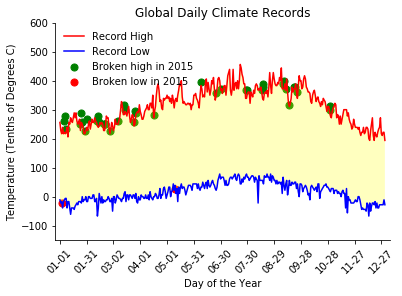

In [60]:
#create new column for Date-separate year and month_date
df["Year"]=df["Date"].apply(lambda x:x[:4])
df["Month-date"]=df["Date"].apply(lambda x:x [-5:])

# exclude leap days: 29/2
df = df[df["Month-date"] != "02-29"]

#max and min in 2015
max_2015=df[(df["Element"]=="TMAX") & (df["Year"]=="2015")].groupby("Month-date").agg({"Data_Value":np.max})
min_2015=df[(df["Element"]=="TMIN") & (df["Year"]=="2015")].groupby("Month-date").agg({"Data_Value":np.min})

#max and min other than in 2015
max_all=df[(df["Element"]=="TMAX") & (df["Year"]!="2015")].groupby("Month-date").agg({"Data_Value":np.max})
min_all=df[(df["Element"]=="TMIN") & (df["Year"]!="2015")].groupby("Month-date").agg({"Data_Value":np.min})

#identify those min/max broken in 2015
break_max=np.where(max_2015["Data_Value"] > max_all["Data_Value"])
break_min=np.where(min_2015["Data_Value"] < min_all["Data_Value"])

#start plotting
plt.figure()
plt.plot(max_all.values,color="red",label ='Record High')
plt.plot(min_all.values,color="blue",label ='Record Low')

plt.scatter(break_max, max_2015.iloc[break_max], s=50, c='green', label='Broken high in 2015')
plt.scatter(break_min, min_2015.iloc[break_min], s=50, c='red', label='Broken low in 2015')

plt.gca().axis([-5, 370, -150, 600])
plt.xticks(range(0, len(max_all), 30), max_all.index[range(0, len(max_all), 30)], rotation=45)
plt.fill_between(range(len(max_all)), max_all['Data_Value'], min_all['Data_Value'], facecolor='yellow', alpha=0.25)
plt.legend(frameon=False, loc=0)
plt.xlabel('Day of the Year')
plt.ylabel('Temperature (Tenths of Degrees C)')
plt.title('Global Daily Climate Records')
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)

plt.show()